In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [79]:
from evolvables.gp import *
from typing import List
# # # ########## Begin setup :) ########## #

# Size of the population
pop_size = 25

# Depth constraint of the expression tree
tree_depth = 5
# Node budget of the expression tree
node_budget = 20

# Initialise factory
progf = ProgramFactory((add, sub, mul, div, sin, cos, mul, div, lim, avg), 1)

# Declare and populate the population
pops: Population[Program[float]] = Population()
for i in range(0, pop_size):
    pops.append(progf.build(tree_depth, node_budget))

variator = ProgramCrossoverVariator(arity = 2, coarity = 3)

support = tuple((x/200,) for x in range(-200,200))
obj = lambda x: sin(x)+2*cos(x)
evaluator = SymbolicEvaluator(obj, support)

selc = Elitist(SimpleSelector[Program[float]](budget = pop_size))

selp = Elitist(SimpleSelector[Program[float]](budget = pop_size))

ctrl = Controller[Program[float]](
    population = pops,
    evaluator = evaluator,
    parent_selector = selc,
    variator = variator,
    offspring_selector = selp
)

best_solutions: List[Program] = []
best_scores: List[Program] = []

scores = []
bests = []

from functools import partial
for i in range(0, 40):
    # ctrl.step(partial(score_keeper, best_scores, best_solutions))
    ctrl.step()
    scores.append(ctrl.population[0].score)
    bests.append(ctrl.population[0].copy())

print (scores)

add(add(add(lim(avg(sym_1, sym_1), lim(sym_1, sym_1, sym_1), lim(sym_1, sym_1, sym_1)), cos(lim(sym_1, sym_1, sym_1))), cos(lim(div(sym_1, sym_1), avg(sym_1, sym_1), sin(sym_1)))), sin(lim(sym_1, lim(sym_1, sym_1, sym_1), sin(cos(sym_1)))))-----lim(cos(mul(sym_1, sym_1)), sym_1, add(lim(lim(sym_1, avg(sym_1, sym_1), sin(sym_1)), div(sym_1, div(sym_1, sym_1)), mul(sym_1, sub(sym_1, sym_1))), cos(avg(sym_1, sym_1))))
cos(mul(sym_1, sym_1))-----lim(sin(avg(sin(mul(sym_1, sym_1)), add(sym_1, sym_1))), sin(lim(sin(mul(sym_1, sym_1)), mul(cos(sym_1), lim(sym_1, sym_1, sym_1)), lim(sin(sym_1), sym_1, lim(sym_1, sym_1, sym_1)))), cos(sym_1))
avg(div(sym_1, sin(sym_1)), sym_1)-----cos(sub(sym_1, div(lim(cos(sym_1), sym_1, sym_1), cos(add(sym_1, sym_1)))))
avg(cos(lim(lim(sin(lim(sym_1, sym_1, sym_1)), lim(mul(sym_1, sym_1), div(sym_1, sym_1), lim(sym_1, sym_1, sym_1)), lim(sym_1, lim(sym_1, sym_1, sym_1), cos(sym_1))), lim(lim(sym_1, sym_1, sym_1), sym_1, sym_1), lim(sym_1, sym_1, sym_1))), lim

In [ ]:
ident: int = 0

In [ ]:
def dispatch_ident()-> str:
    global ident
    return "a" + str(*(ident:=ident+1,))

print(dispatch_ident())

a1


In [62]:
import graphviz
from typing import Callable





def p2str(gp, dispatcher: Callable[[], str]) -> str:
    expr = gp.expr
    my_name: str = expr._function.__name__ if callable(expr._function) else str(expr._function)
    my_ident = dispatcher()
    dot = graphviz.Digraph('square-peg', comment='The Square Peg')
    dot.node(my_ident, my_name)

    for each_child in expr.children:
        print("voila")
        p2str_recurse(each_child, dot, my_ident, dispatcher)

    return dot
         

def p2str_recurse(expr, dot, parent_ident, dispatcher: Callable[[], str]) -> str: 
    my_name: str = expr._function.__name__ if callable(expr._function) else str(expr._function)
    my_ident = dispatcher()

    dot.node(my_ident, my_name)
    dot.edge(parent_ident, my_ident)

    for each_child in expr.children:
        p2str_recurse(each_child, dot, my_ident, dispatcher)

a = p2str(bests[1], dispatch_ident)

voila
voila


In [63]:
str(bests[1])

'add(sym_1, add(cos(sin(div(sym_1, sym_1))), lim(sin(lim(sym_1, sym_1, sym_1)), div(lim(sym_1, sym_1, sym_1), lim(sym_1, sym_1, sym_1)), lim(lim(sym_1, sym_1, sym_1), lim(sym_1, sym_1, sym_1), div(sym_1, sym_1)))))'

((-1.0,),
 (-0.995,),
 (-0.99,),
 (-0.985,),
 (-0.98,),
 (-0.975,),
 (-0.97,),
 (-0.965,),
 (-0.96,),
 (-0.955,),
 (-0.95,),
 (-0.945,),
 (-0.94,),
 (-0.935,),
 (-0.93,),
 (-0.925,),
 (-0.92,),
 (-0.915,),
 (-0.91,),
 (-0.905,),
 (-0.9,),
 (-0.895,),
 (-0.89,),
 (-0.885,),
 (-0.88,),
 (-0.875,),
 (-0.87,),
 (-0.865,),
 (-0.86,),
 (-0.855,),
 (-0.85,),
 (-0.845,),
 (-0.84,),
 (-0.835,),
 (-0.83,),
 (-0.825,),
 (-0.82,),
 (-0.815,),
 (-0.81,),
 (-0.805,),
 (-0.8,),
 (-0.795,),
 (-0.79,),
 (-0.785,),
 (-0.78,),
 (-0.775,),
 (-0.77,),
 (-0.765,),
 (-0.76,),
 (-0.755,),
 (-0.75,),
 (-0.745,),
 (-0.74,),
 (-0.735,),
 (-0.73,),
 (-0.725,),
 (-0.72,),
 (-0.715,),
 (-0.71,),
 (-0.705,),
 (-0.7,),
 (-0.695,),
 (-0.69,),
 (-0.685,),
 (-0.68,),
 (-0.675,),
 (-0.67,),
 (-0.665,),
 (-0.66,),
 (-0.655,),
 (-0.65,),
 (-0.645,),
 (-0.64,),
 (-0.635,),
 (-0.63,),
 (-0.625,),
 (-0.62,),
 (-0.615,),
 (-0.61,),
 (-0.605,),
 (-0.6,),
 (-0.595,),
 (-0.59,),
 (-0.585,),
 (-0.58,),
 (-0.575,),
 (-0.57,),
 (-0.

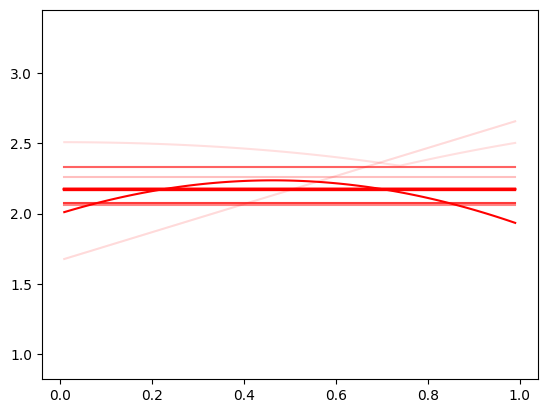

In [65]:


from typing import Sequence
from typing import Tuple

from matplotlib import pyplot as plt

def plot_range(function: Callable[[float], float], support:Sequence[Tuple[float,]], color: str, alpha: float):
    xs = [t[0] for t in support]
    ys = [function(x) for x in xs]
    plt.plot(xs, ys, color=color, alpha=alpha)

def alpha_from_index(bests, index):
    return index / len(bests)

plot_range(obj, support, "red", 1)

for i in range(len(bests)):
    plot_range(bests[i], support, "red", alpha_from_index(bests, i))


plt.show()

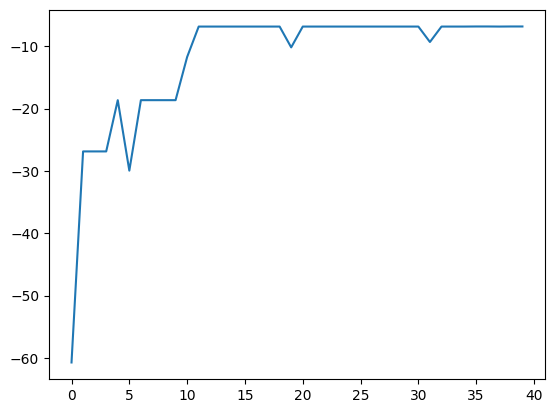

In [76]:
plt.plot(list(range(len(scores))), scores)
plt.show()